# plot maps of age change

In [1]:
%matplotlib inline
from config_calc import *

import matplotlib
import matplotlib.pyplot as plt
from cartopy.util import add_cyclic_point
import matplotlib.gridspec as gridspec
plt.rcParams['mathtext.default']='regular'

import cmocean
import plot_tools
import proc_cesm_le

### read the CESM-LE data

In [2]:
%%time
tr85 = proc_cesm_le.open_ens('tr85','ann_dft_tanm',['IAGE'],
                             isel={'time':-1})
baseline = proc_cesm_le.open_ens('tr85','ann_dft_tavg_1920-1939',['IAGE'])
print tr85
print baseline

<xarray.Dataset>
Dimensions:   (ens: 33, nlat: 384, nlon: 320, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t       (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 5.5e+03 ...
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: ens, nlat, nlon
Data variables:
    IAGE      (ens, z_t, nlat, nlon) float32 nan nan nan nan nan nan nan nan ...
    year      float64 170.5
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 1.124e+13 ...
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    UAREA     (nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT      (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 -78.95 -78.95 ...
    U

<xarray.Dataset>
Dimensions:   (ens: 33, nlat: 384, nlon: 320, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t       (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 5.5e+03 ...
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: ens, nlat, nlon
Data variables:
    IAGE      (ens, z_t, nlat, nlon) float32 nan nan nan nan nan nan nan nan ...
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 1.124e+13 ...
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    UAREA     (nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT      (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 -78.95 -78.95 ...
    ULONG     (nlat, nlon) float6

### compute ensemble mean

In [3]:
%%time
tr85a = tr85.mean(dim='ens')
baselinea = baseline.mean(dim='ens')
print tr85a

<xarray.Dataset>
Dimensions:   (nlat: 384, nlon: 320, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t       (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 5.5e+03 ...
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    IAGE      (z_t, nlat, nlon) float32 nan nan nan nan nan nan nan nan nan ...
    year      float64 170.5
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 1.124e+13 ...
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    UAREA     (nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT      (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 -78.95 -78.95 ...
    ULONG     (nlat,

/glade/p/work/mclong/miniconda2/lib/python2.7/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


compute to avoid memory issues with many files open

In [4]:
%%time
tr85a = tr85a.compute()
baselinea = baselinea.compute()

CPU times: user 20.1 s, sys: 8.24 s, total: 28.4 s
Wall time: 18.7 s


### compute thermocline averages

In [5]:
%%time
nz = tr85.z_t.shape[0]
nlat = tr85.KMT.shape[0]
nlon = tr85.KMT.shape[1]
zmask = xr.DataArray(np.ones(nz),dims='z_t')

rmask = xr.DataArray(np.zeros((nz,nlat,nlon)),dims=('z_t','nlat','nlon'))
rmask[:,:,:] = np.where(tr85.KMT > 0, 1., 0.)

zmask = (tr85.dz.where( (200e2<=tr85.z_t)&(tr85.z_t<=600e2) ) / tr85.dz.where( (200e2<=tr85.z_t)&(tr85.z_t<=600e2)) ).fillna(0.)
rmask = rmask * zmask
rmask

CPU times: user 274 ms, sys: 20 ms, total: 294 ms
Wall time: 289 ms


In [6]:
%%time
reload(et)
tr85_tc = et.pop_calc_spatial_mean(tr85a.copy(),avg_over_dims=['z_t'],region_mask=rmask)
baseline_tc = et.pop_calc_spatial_mean(baselinea.copy(),avg_over_dims=['z_t'],region_mask=rmask)
print tr85_tc
print baseline_tc

computing mean: IAGE
computing ocean volume


applying mask


computing volume weights
computing mean: IAGE
computing ocean volume


applying mask


computing volume weights


/glade/p/work/mclong/miniconda2/lib/python2.7/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in divide
  return func(*args2)


<xarray.Dataset>
Dimensions:   (nlat: 384, nlon: 320, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t       (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 5.5e+03 ...
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    IAGE      (nlat, nlon) float64 nan nan nan nan nan nan nan nan nan nan ...
    year      float64 170.5
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 1.124e+13 ...
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    UAREA     (nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT      (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 -78.95 -78.95 ...
    ULONG     (nlat, 

<xarray.Dataset>
Dimensions:   (nlat: 384, nlon: 320, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t       (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 5.5e+03 ...
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    IAGE      (nlat, nlon) float64 nan nan nan nan nan nan nan nan nan nan ...
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 1.124e+13 ...
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    UAREA     (nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT      (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 -78.95 -78.95 ...
    ULONG     (nlat, nlon) float64 321.1 322.3 32

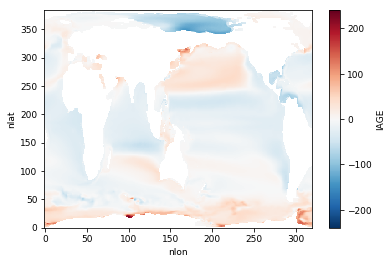

In [7]:
tr85_tc.IAGE.plot()

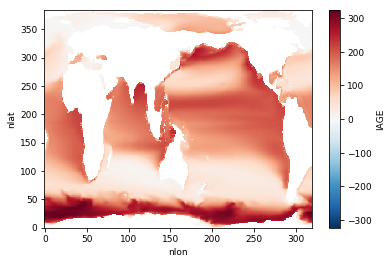

In [8]:
baseline_tc.IAGE.plot()

In [9]:
LON = [[]]*2
LAT = [[]]*2
Z = [[]]*2
lon = tr85.TLONG.values
lat = tr85.TLAT.values
field = tr85_tc.IAGE.values
LON[1],LAT[1],Z[1]= plot_tools.adjust_pop_grid(lon,lat,field)

lon = tr85.TLONG.values
lat = tr85.TLAT.values
field = baseline_tc.IAGE.values
LON[0],LAT[0],Z[0]= plot_tools.adjust_pop_grid(lon,lat,field)


for lon,lat,z in zip(LON,LAT,Z):
    print z.shape
    print lon.shape
    print lat.shape

(384, 321)
(384, 321)
(384, 321)
(384, 321)
(384, 321)
(384, 321)


/glade/p/work/mclong/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


initial plot size (display units): 6.98,3.54
Adjusting fig size:
	(W,H in): 10.00,4.00 --> 8.03,6.73
new plot size: 5.61,3.57


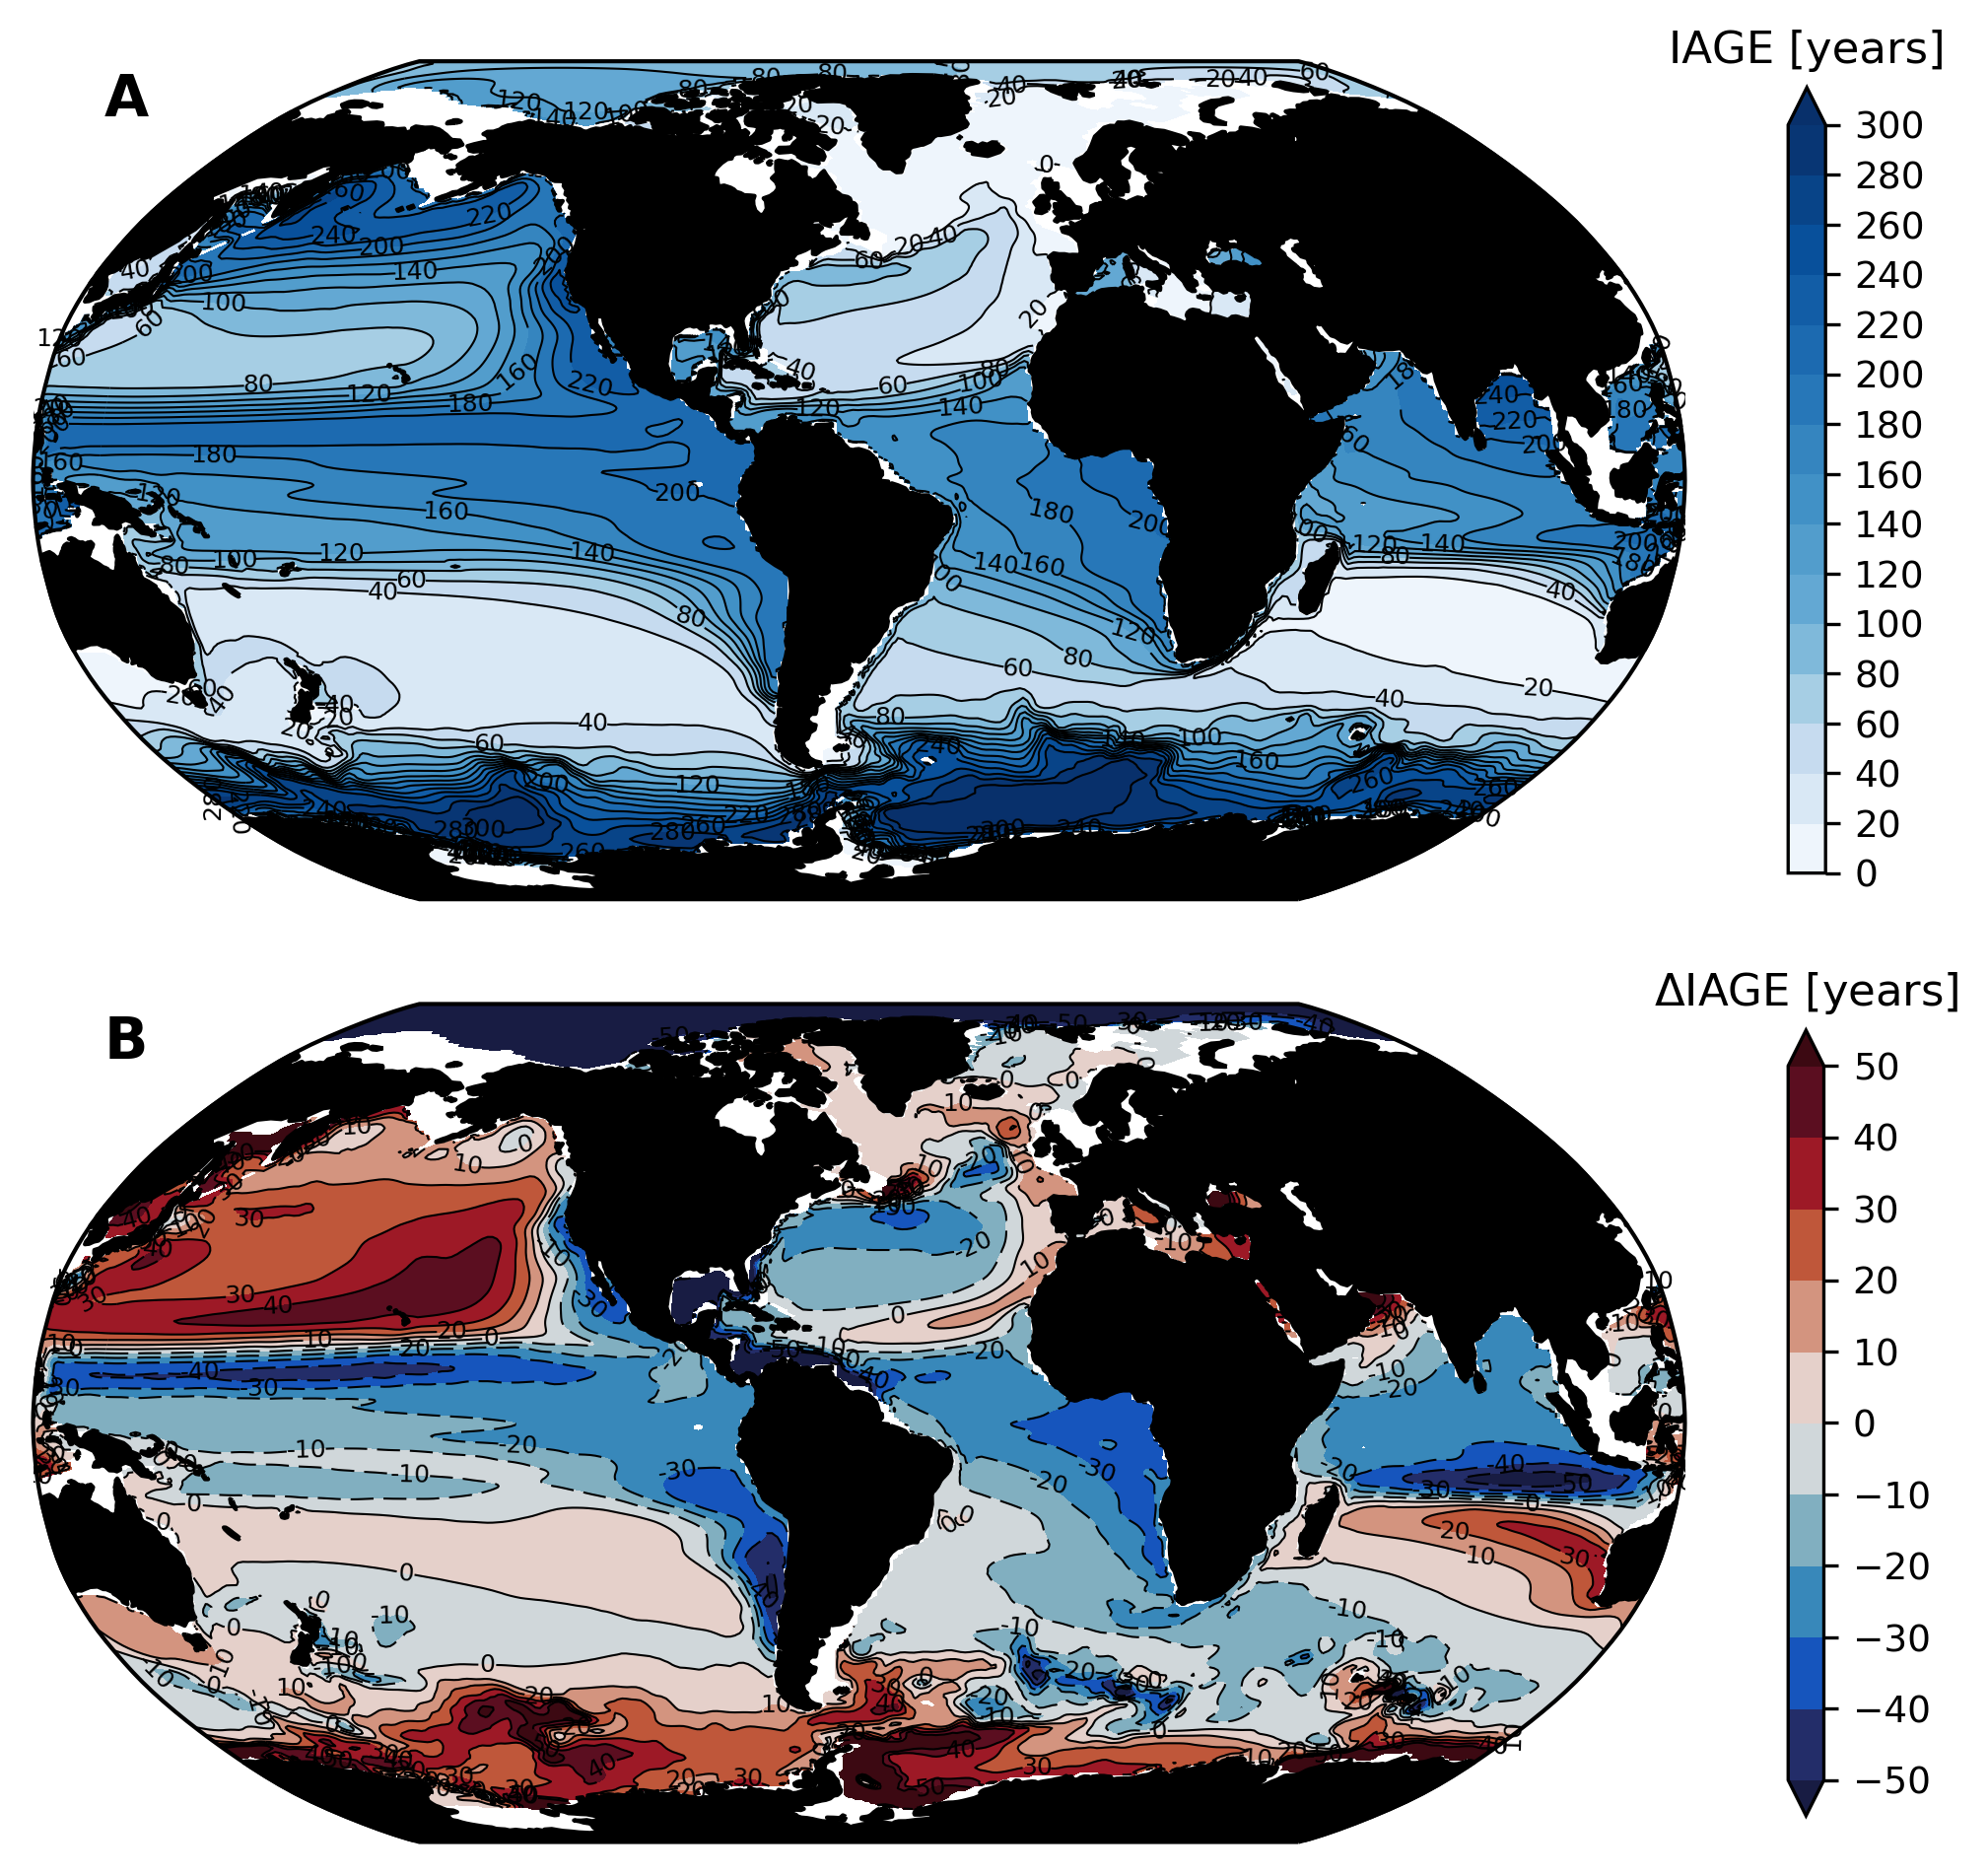

In [10]:
plot_name = os.path.join(diro['fig'],'cesm-thermocline-iage-change.pdf')

matplotlib.rcParams['contour.negative_linestyle'] = 'dashed'

fig=plt.figure(figsize=(10, 4),dpi=300)
gs = gridspec.GridSpec(2,1)


obj = [[]]*2
ax = []
for i,(lon,lat,z) in enumerate(zip(LON,LAT,Z)):

    if i == 0:
        levels = np.arange(0.,320.,20.)
        units = 'IAGE [years]'
        norm = plot_tools.MidPointNorm(midpoint=100.)
        contour_specs = {'levels':levels,
                         'cmap':'Blues',
                         'extend':'max',
                          'norm':norm}
    else:
        levels = np.arange(-50.,60.,10)
        norm = plot_tools.MidPointNorm(midpoint=0)
        units = '$\Delta$IAGE [years]'
        contour_specs = {'levels':levels,'cmap':cmocean.cm.balance,'norm':norm,'extend':'both'}
          
    obj[i] = plot_tools.canvas_map_contour_overlay(lon,lat,z,
                                                   contour_specs,
                                                   units = units,
                                                   fig=fig,
                                                   gridspec=gs,
                                                   row=i,col=0)
    ax.append(obj[i]['ax'])

gridspec_kwargs = {'hspace' : -0.1,
                   'wspace' : 0.05,
                   'left' : 0.,
                   'right' : 0.87,
                   'bottom' : 0.,
                   'top' : 1.}
fgsz = plot_tools.plotgrid(fig, gs, ax, [2,1],gridspec_kwargs)

alp = [chr(i).upper() for i in range(97,97+26)]
for i,axi in enumerate(ax):
    p = axi.get_position()
    y = p.y1-0.08
    fig.text(0.03,y,'%s'%alp[i],
             fontsize=14.,
             fontweight = 'semibold')
    
plt.savefig(plot_name,dpi=300,bbox_inches='tight')